In [5]:
import numpy as np
import pandas as pd 
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path

In [6]:
current_dir = Path(os.getcwd())

# Construct the relative path to the CSV file
csv_file = current_dir.parent / 'Titantic_Predictor' / 'train.csv'

# Read the CSV file using pandas
df = pd.read_csv(csv_file)

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


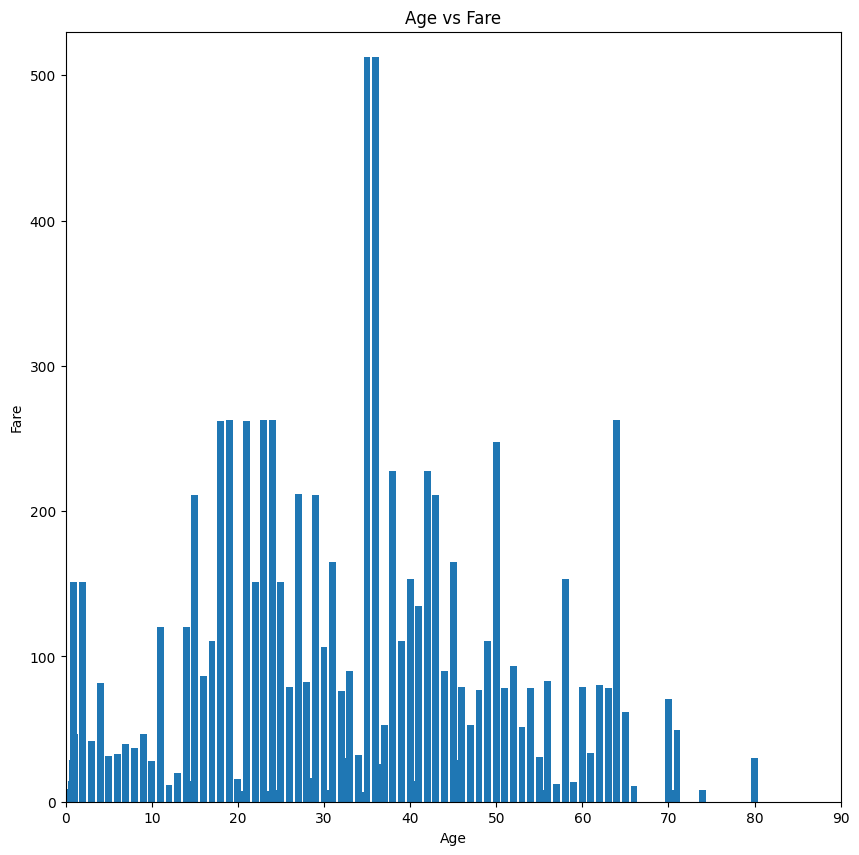

In [20]:
plt.figure(figsize=(10, 10))  # Create a new figure
plt.bar(df["Age"], df["Fare"])  # Plot the bar chart
# add a title to the chart
plt.title("Age vs Fare")
# add labels to the x and y axes
plt.xlabel("Age")
plt.ylabel("Fare")

# Set the y-axis lables between 0 and 530
plt.ylim(0, 530)
# Set the x-axis lables between 0 and 90
plt.xlim(0, 90)


# Show the plot
plt.show()

# can you make this a stacked bar chart instead? use all of the same data. Age and fare. but include gender aswell. and color code the stacked bar charts to show the gender. Also have a legend the shows the colors that belong to each gender




In [26]:
print("Unique Age Groups:", df["Age"].unique())

# Print the number of unique age groups
print("Number of Unique Age Groups:", len(df["Age"].unique()))

# Print the shape of fare values for males
print("Shape of Fare Values for Males:", df[df["Sex"] == "male"]["Fare"].shape)

# Print the shape of fare values for females
print("Shape of Fare Values for Females:", df[df["Sex"] == "female"]["Fare"].shape)

Unique Age Groups: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
Number of Unique Age Groups: 89
Shape of Fare Values for Males: (577,)
Shape of Fare Values for Females: (314,)


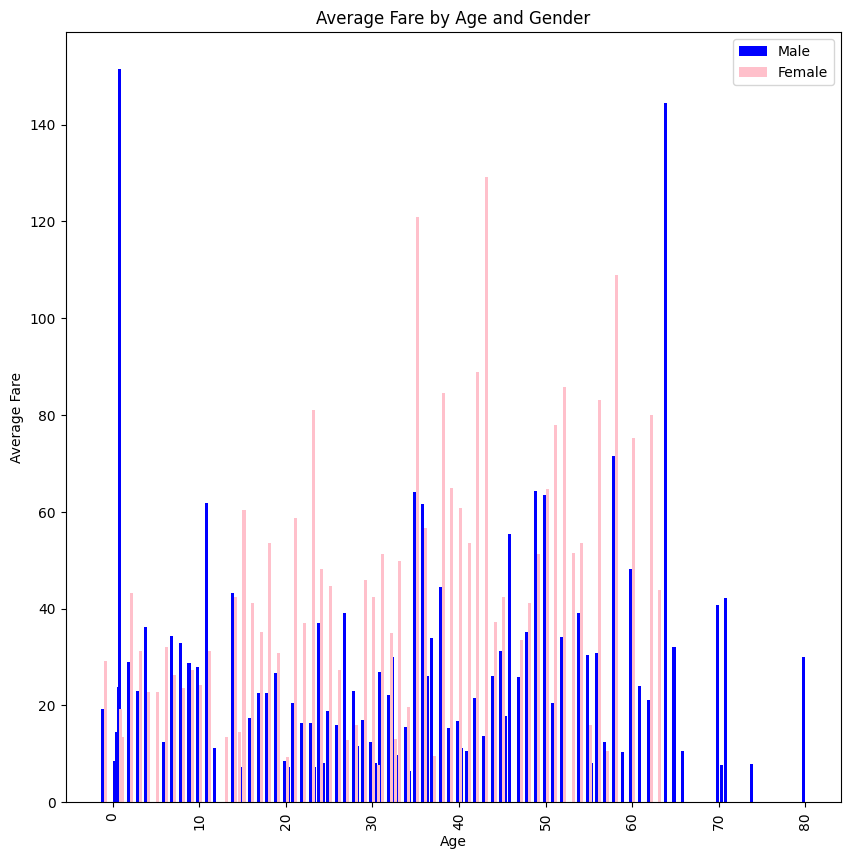

Lowest Age: -1.0
PassengerId of Person with Lowest Age: 6
Highest Age: 80.0
PassengerId of Person with Highest Age: 631


In [32]:
df["Age"].fillna(-1, inplace=True)

# Create a dictionary to store fare values for each age group and gender
fare_by_age_gender = {}

# Iterate over the DataFrame to populate the dictionary
for _, row in df.iterrows():
    age = row["Age"]
    sex = row["Sex"]
    fare = row["Fare"]
    
    if age not in fare_by_age_gender:
        fare_by_age_gender[age] = {"male": [], "female": []}
    
    if sex == "male":
        fare_by_age_gender[age]["male"].append(fare)
    else:
        fare_by_age_gender[age]["female"].append(fare)

# Convert the dictionary to arrays for plotting
age_groups = []
male_fares = []
female_fares = []

for age, fares in fare_by_age_gender.items():
    age_groups.append(age)
    male_fares.append(np.mean(fares["male"]))
    female_fares.append(np.mean(fares["female"]))

# Convert lists to numpy arrays
age_groups = np.array(age_groups)
male_fares = np.array(male_fares)
female_fares = np.array(female_fares)

# Define the width of each bar
bar_width = 0.35

# Create a new figure
plt.figure(figsize=(10, 10))

# Plot grouped bar charts for each gender
plt.bar(age_groups - bar_width/2, male_fares, 
        width=bar_width, color='blue', label='Male')
plt.bar(age_groups + bar_width/2, female_fares, 
        width=bar_width, color='pink', label='Female')

# Add labels to the x and y axes
plt.xlabel("Age")
plt.ylabel("Average Fare")
plt.title("Average Fare by Age and Gender")

# Set the x-axis tick labels to be the age groups
plt.xticks(rotation='vertical')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# what is the lowest age? and what is the PassengerId of the person with the lowest age?
print("Lowest Age:", df["Age"].min())
print("PassengerId of Person with Lowest Age:", 
      df[df["Age"] == df["Age"].min()]["PassengerId"].values[0])

# what is the highest age? and what is the PassengerId of the person with the highest age?
print("Highest Age:", df["Age"].max())
print("PassengerId of Person with Highest Age:", 
      df[df["Age"] == df["Age"].max()]["PassengerId"].values[0])


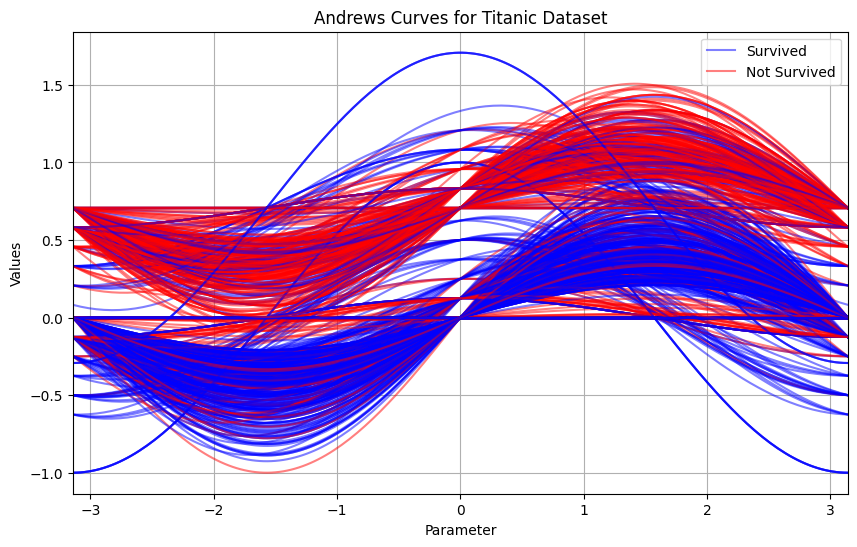

In [45]:
from pandas.plotting import andrews_curves
from sklearn.preprocessing import MinMaxScaler

selected_columns = ['Survived', 'Sex', 'Age', 'SibSp']
df_selected = df[selected_columns].copy()

# Encode 'Sex' column into numerical values
df_selected.loc[:, 'Sex'] = df_selected['Sex'].map({'male': 0, 'female': 1})

# Normalize 'Age' and 'SibSp' columns to the range [0, 1]
scaler = MinMaxScaler()
df_selected.loc[:, ['Age', 'SibSp']] = scaler.fit_transform(df_selected[['Age', 'SibSp']])

# Separate data by 'Survived' classes
df_survived = df_selected[df_selected['Survived'] == 1]
df_not_survived = df_selected[df_selected['Survived'] == 0]

# Plot Andrews curves for each class separately with custom colors
plt.figure(figsize=(10, 6))
andrews_curves(df_selected, 'Survived', color=['blue', 'red'], alpha=0.5)

# label the axis
plt.xlabel('Parameter')
plt.ylabel('Values')

# Create custom legend with all categories
plt.legend(['Survived', 'Not Survived'], loc='best')

plt.title('Andrews Curves for Titanic Dataset')
plt.show()